In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import random
from pprint import pprint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import timeit
import matplotlib.pyplot as plt
from dtreefunctions import decision_tree_algorithm,decision_tree_predictions,train_test_split

In [2]:
df = pd.read_csv("breast-cancer.csv")
df["label"] = df.Class
df = df.drop("Class", axis=1)

column_names = []
for column in df.columns:
    name = column.replace("-", "_")
    column_names.append(name)
df.columns = column_names
df.head()

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,label
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [3]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.2)

In [4]:
train_df.head(2)

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,label
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events


In [5]:
test_df.head(2)

,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat,label
197,40-49,premeno,Oct-14,0-2,no,2,left,left_low,yes,no-recurrence-events
215,40-49,ge40,20-24,0-2,no,2,right,left_up,no,recurrence-events


In [9]:
tic=timeit.default_timer()
accuracies = []
f1score = []
#x=range(1,21)
x=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
for i in x:
    tree = decision_tree_algorithm(train_df, min_samples=i)
    y_pred = decision_tree_predictions(test_df,tree)
    accuracies.append(accuracy_score(test_df.label,y_pred))
    f1score.append(f1_score(test_df.label,y_pred,average='micro'))
toc=timeit.default_timer()
print(toc - tic)    


0.662650013000075


In [10]:
index_accuracies = x
column_name=["Accuracies","f1score"]
df_result = pd.DataFrame({'Accuracies':accuracies, 'f1score':f1score})



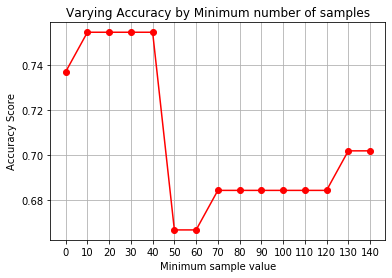

In [11]:
#sns.distplot(x=range(1,21),y=df_accuracies['Accuracies'], bins = 20)

plt.plot(x,df_result["Accuracies"],'r',marker='o') # 'r' is the color red
plt.xlabel('Minimum sample value')
plt.ylabel('Accuracy Score')
plt.title('Varying Accuracy by Minimum number of samples')
plt.grid(True)
plt.xticks(x)
plt.show()
